## <center>Car Price Prediction Using Machine learning</center>
A cetain car manufacturing company in china wants to enter and set up their market in US and give competition to their counterparts.In view of this, they want to understand the factors that affect the price of cars in America since price might differ in china.
## The company wants;
1. To understand significant variables for car price prediction
2. To know how well these variables describe the price of a car 
3. To build a perfect predictive model that will help them predict price of car in US

## STEP 1: Reading And Understanding The Data
First;
* We Import Numpy, Pandas, Matplotlib, and Seaborn for Data Analysis and Visualizations
* We Import Sklearn for Machine Learning Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# we import libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [3]:
# Now lets read in our data
data = pd.read_csv('C:\\Users\\hp\\Desktop\\Projects\\CarPrice_Assignment.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Examining the Data
* This is an Important Step in Data Science and Machine Learning to ensure that columns and rows are both present.
* First, we will check the shape of the dataset
* Second, we will check the information about the datasets
* Third, we will check the Data Description
* Then, we will check the columns present in the data.

In [4]:
# Now lets understand how the data is in a general formart
data.shape

(205, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
list(data)

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

## <center>Data Description</center>

<table>
    <tr>
        <td><b>Variable</b></td>
        <td><b>Definition</b></td>
    </tr>
    <tr>
        <td>car_ID</td>
        <td>Unique ID for the cars<td>
    </tr>
    <tr>
        <td>symboling</td>
        <td>Symbol for the cars</td>
    </tr>
    <tr>
        <td>region</td>
        <td>Region of employment (unordered)</td>
    </tr>
    <tr>
        <td>education</td>
        <td>Education Level</td>
    </tr>
    <tr>
        <td>gender</td>
        <td>Gender of Employee</td>
    </tr>
    <tr>
        <td>recruitment_channel</td>
        <td>Channel of recruitment for employee</td>
    </tr>
    <tr>
        <td>no_of_trainings</td>
        <td>no of other trainings completed in previous year on soft skills, technical skills etc.</td>
    </tr>
    <tr>
        <td>age</td>
        <td>Age of Employee</td>
    </tr>
    <tr>
        <td>previous_year_rating</td>
        <td>Employee Rating for the previous year</td>
    </tr>
    <tr>
        <td>length_of_service</td>
        <td>Length of service in years</td>
    </tr>
    <tr>
        <td>KPIs_met >80%</td>
        <td>if Percent of KPIs(Key performance Indicators) >80% then 1 else 0</td>
    </tr>
    <tr>
        <td>awards_won?</td>
        <td>if awards won during previous year then 1 else 0</td>
    </tr>
    <tr>
        <td>avg_training_score</td>
        <td>Average score in current training evaluations</td>
    </tr>
    <tr>
        <td>is_promoted	(Target)</td>
        <td>Recommended for promotion</td>
    </tr>
</table>

In [173]:
# checking for missing values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [174]:
# we drop the car_ID  since we no longer need it for analysis
data = data.drop('car_ID', axis = 1)

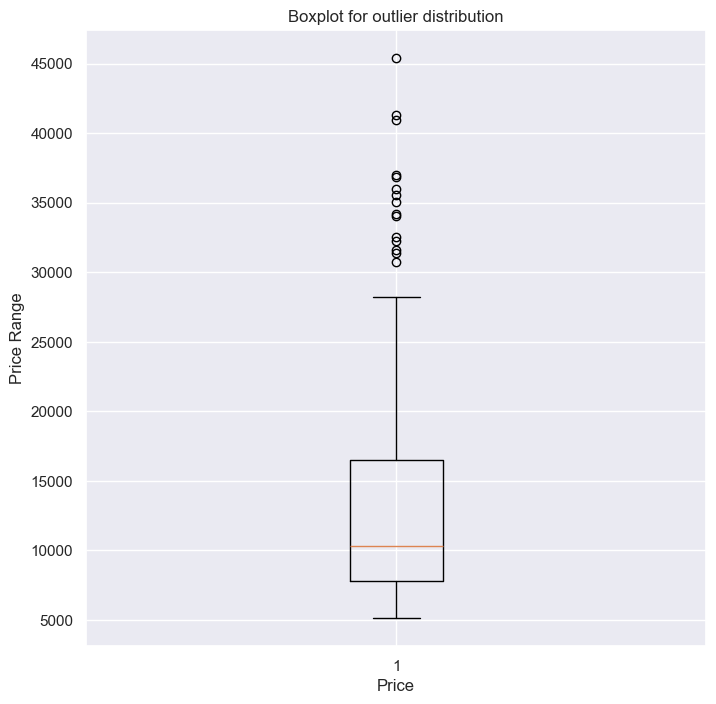

In [175]:
# Checking for outliers
plt.rcParams['figure.figsize'] = [8,8]
plt.title("Boxplot for outlier distribution")
plt.xlabel("Price")
plt.ylabel("Price Range")
plt.boxplot(data['price'])
plt.show()

We can detect values which extreamly differ from the rest of the data, i.e, prices that above 30000 
We can either choose to delete them from the dataset, use standardization scaling or use log transformation. 
We will use logarithmic transformation 

In [176]:
# lets change the datatype for symboling
data['symboling'] = data['symboling'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [177]:
# we then check for duplicates and remove them 
data.loc[data.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


We dont have any duplicate entries

In [178]:
# first, lets investigate the carName column
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Now, the observation looks messy so lets drop the column

In [179]:
data = data.drop('CarName', axis=1)
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000
1,3,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000
2,1,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000
3,2,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000
4,2,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.100000,188.800000,68.900000,55.500000,2952,ohc,four,141,mpfi,3.780000,3.150000,9.500000,114,5400,23,28,16845.000000
201,-1,gas,turbo,four,sedan,rwd,front,109.100000,188.800000,68.800000,55.500000,3049,ohc,four,141,mpfi,3.780000,3.150000,8.700000,160,5300,19,25,19045.000000
202,-1,gas,std,four,sedan,rwd,front,109.100000,188.800000,68.900000,55.500000,3012,ohcv,six,173,mpfi,3.580000,2.870000,8.800000,134,5500,18,23,21485.000000
203,-1,diesel,turbo,four,sedan,rwd,front,109.100000,188.800000,68.900000,55.500000,3217,ohc,six,145,idi,3.010000,3.400000,23.000000,106,4800,26,27,22470.000000


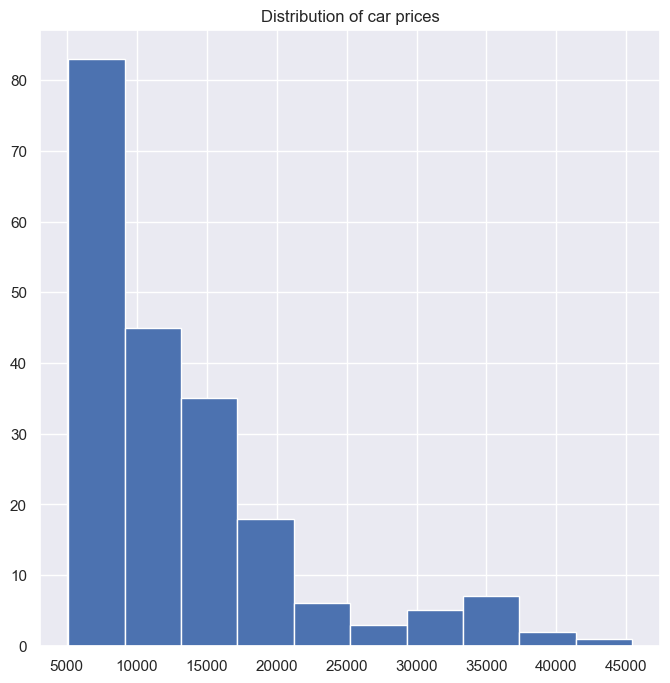

In [180]:
#lets do some visualization
plt.rcParams['figure.figsize'] = [8,8]
plt.title("Distribution of car prices")
plt.hist(data['price'])
plt.show()

Now, the data seems to be right skewed, whcih tells that the price of most cars tends to be less than 20000. Price is not normaly distributed. lets use log transformation

In [181]:
data['price'] = np.log(data['price'])

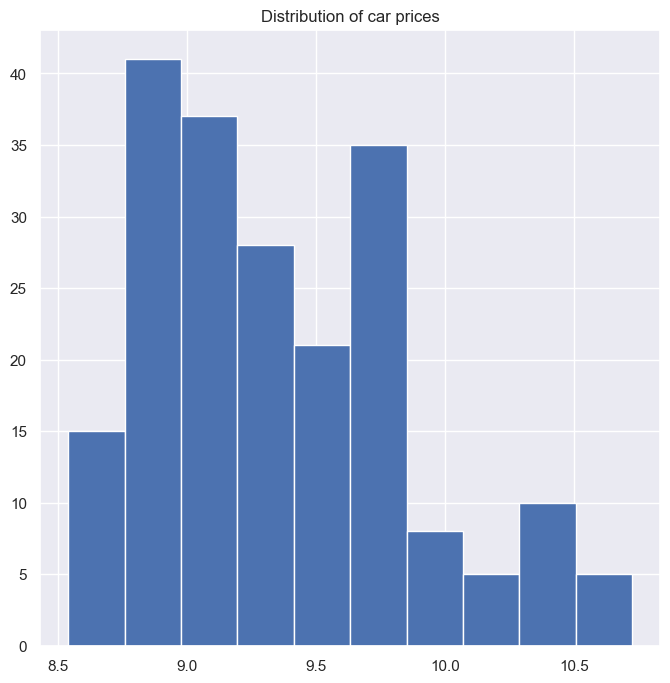

In [182]:
plt.rcParams['figure.figsize'] = [8,8]
plt.title("Distribution of car prices")
plt.hist(data['price'])
plt.show()

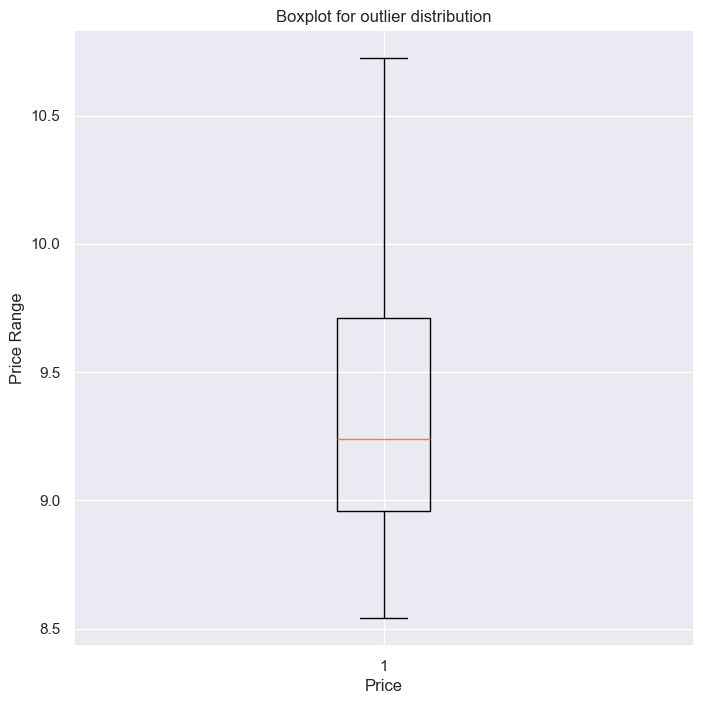

In [183]:
plt.rcParams['figure.figsize'] = [8,8]
plt.title("Boxplot for outlier distribution")
plt.xlabel("Price")
plt.ylabel("Price Range")
plt.boxplot(data['price'])
plt.show()

Its now clear, that price is nearly symetrical, which implies ist normally distributed. We can also see that we no longer have outliers.

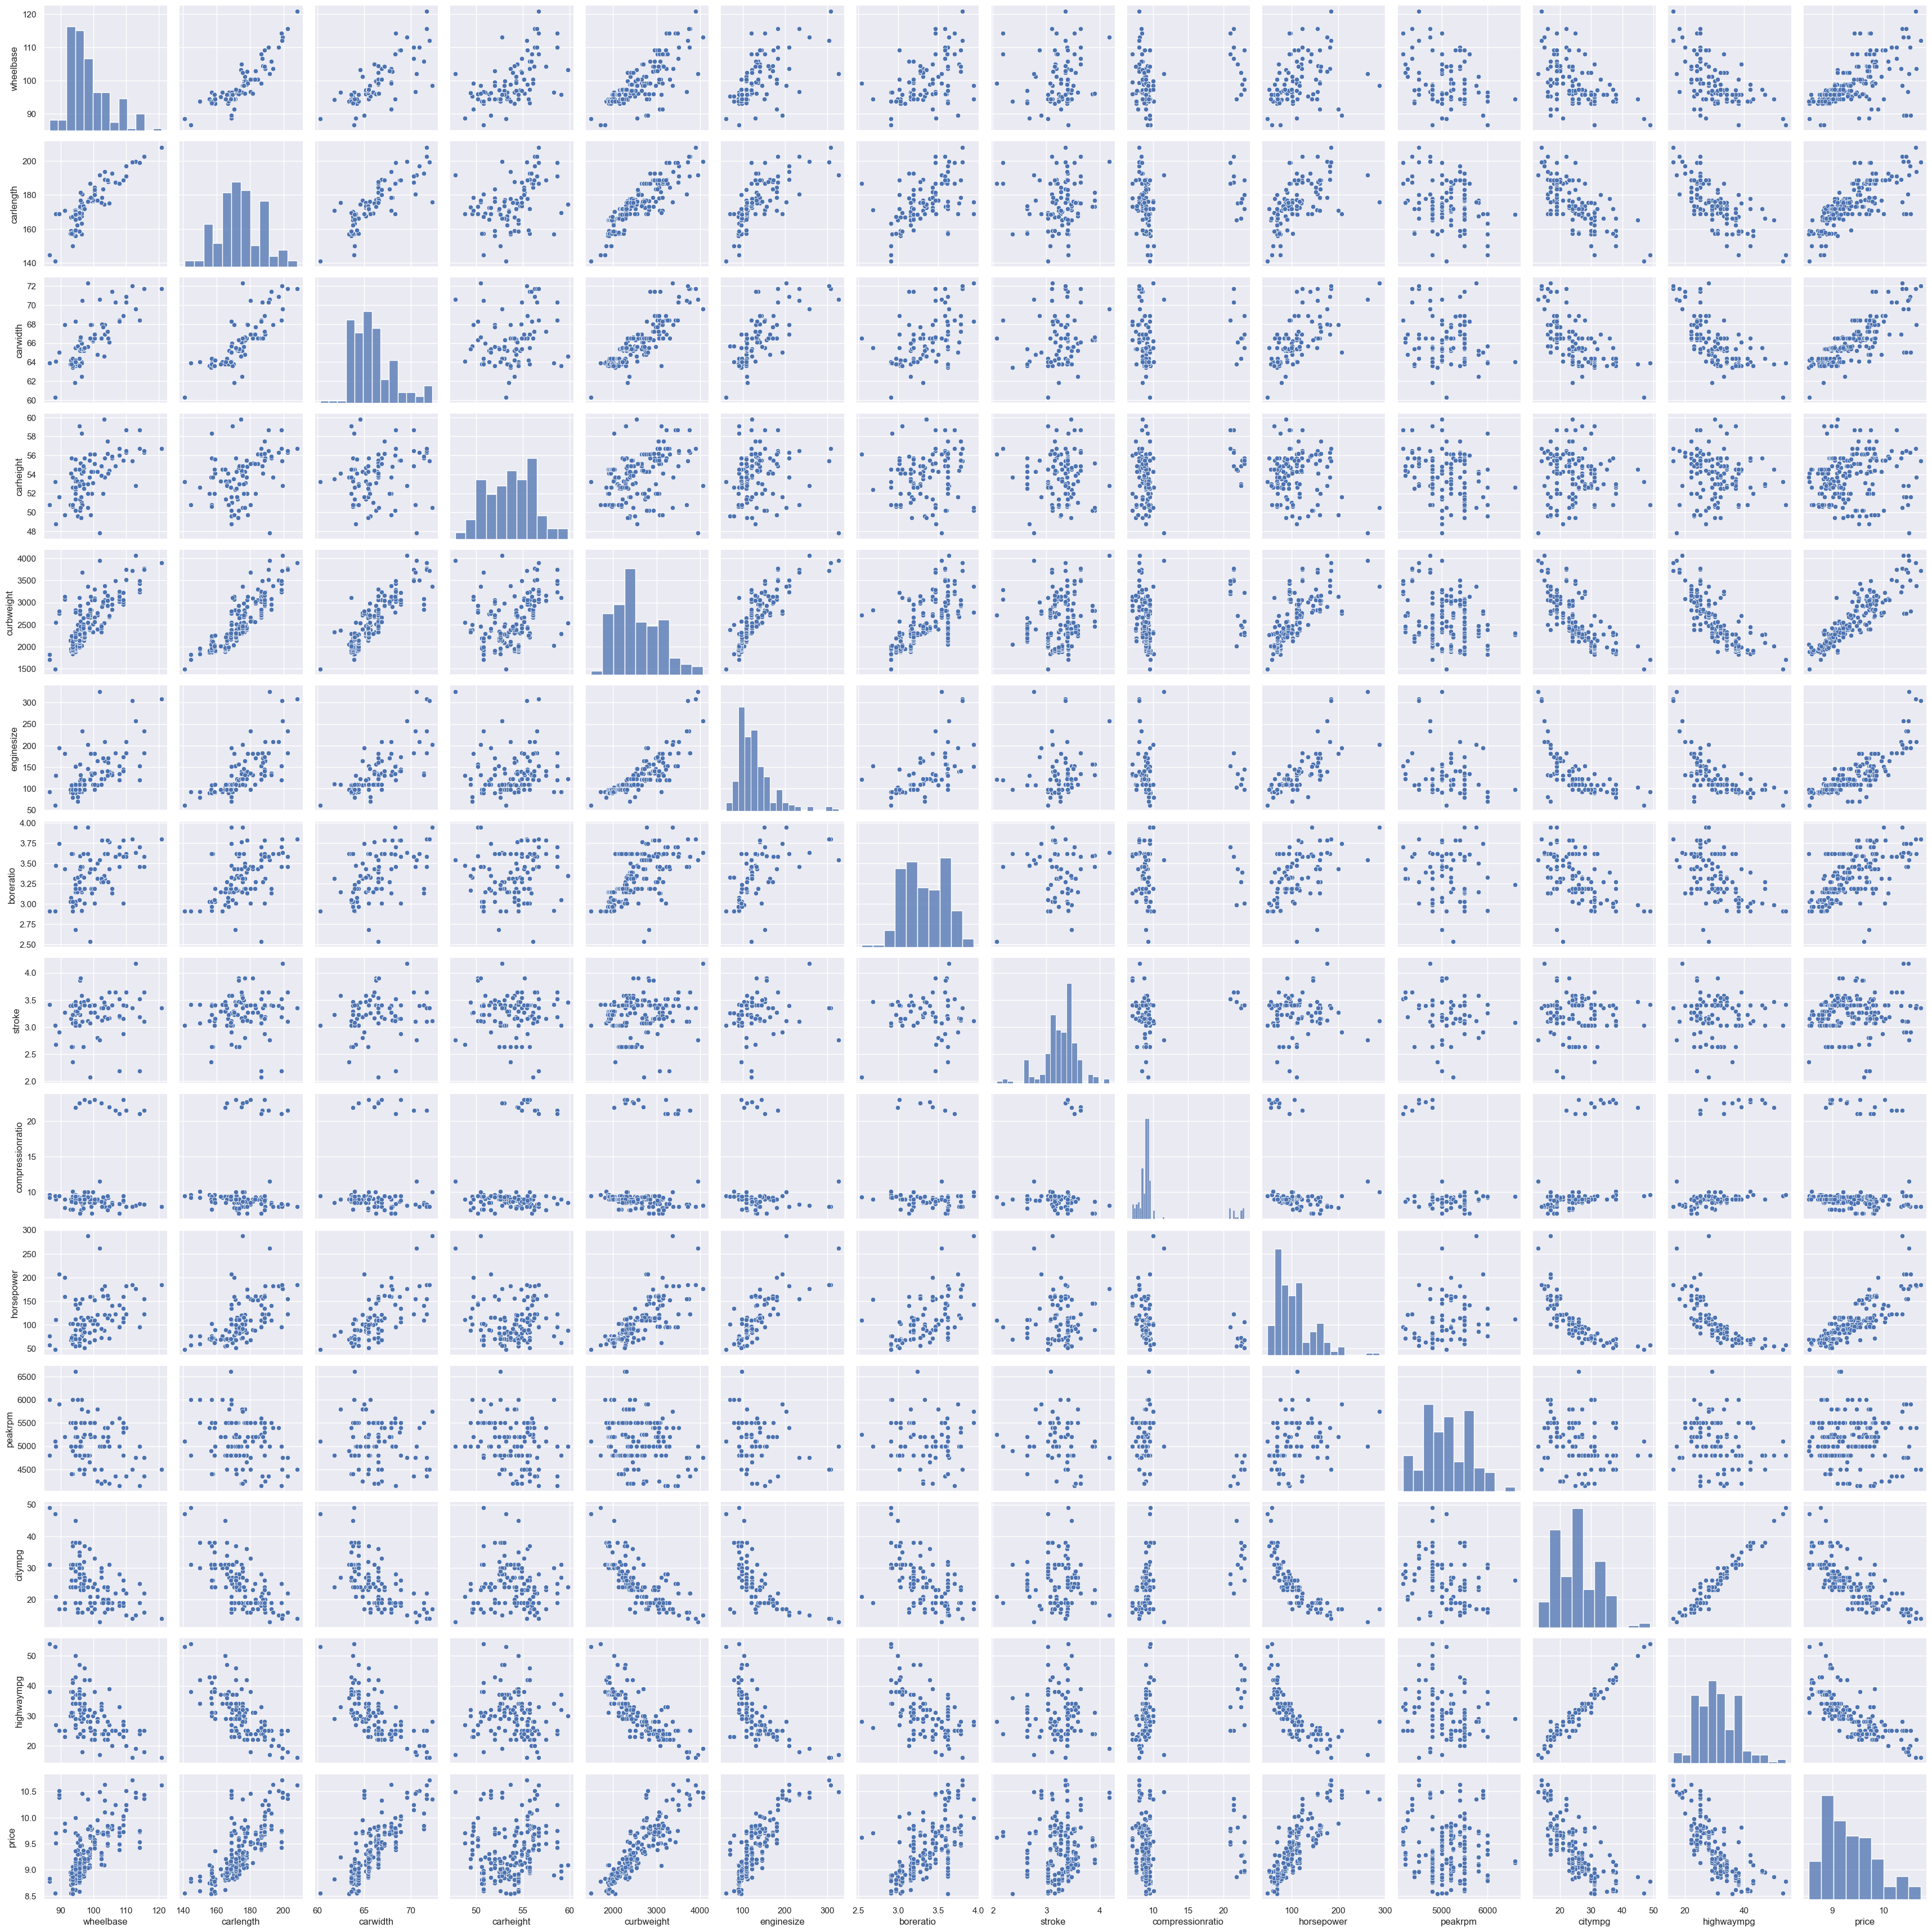

In [184]:
#lets divide categorical and numerical variables and plot a pairplot for numerical variable
num_col = data.select_dtypes(exclude = ['object']).columns
cat_col = data.select_dtypes(include = ['object']).columns
data_cat = data[cat_col]
data_num = data[num_col]
ax = sns.pairplot(data[num_col])
plt.show(ax)

<Axes: xlabel='fuelsystem', ylabel='price'>

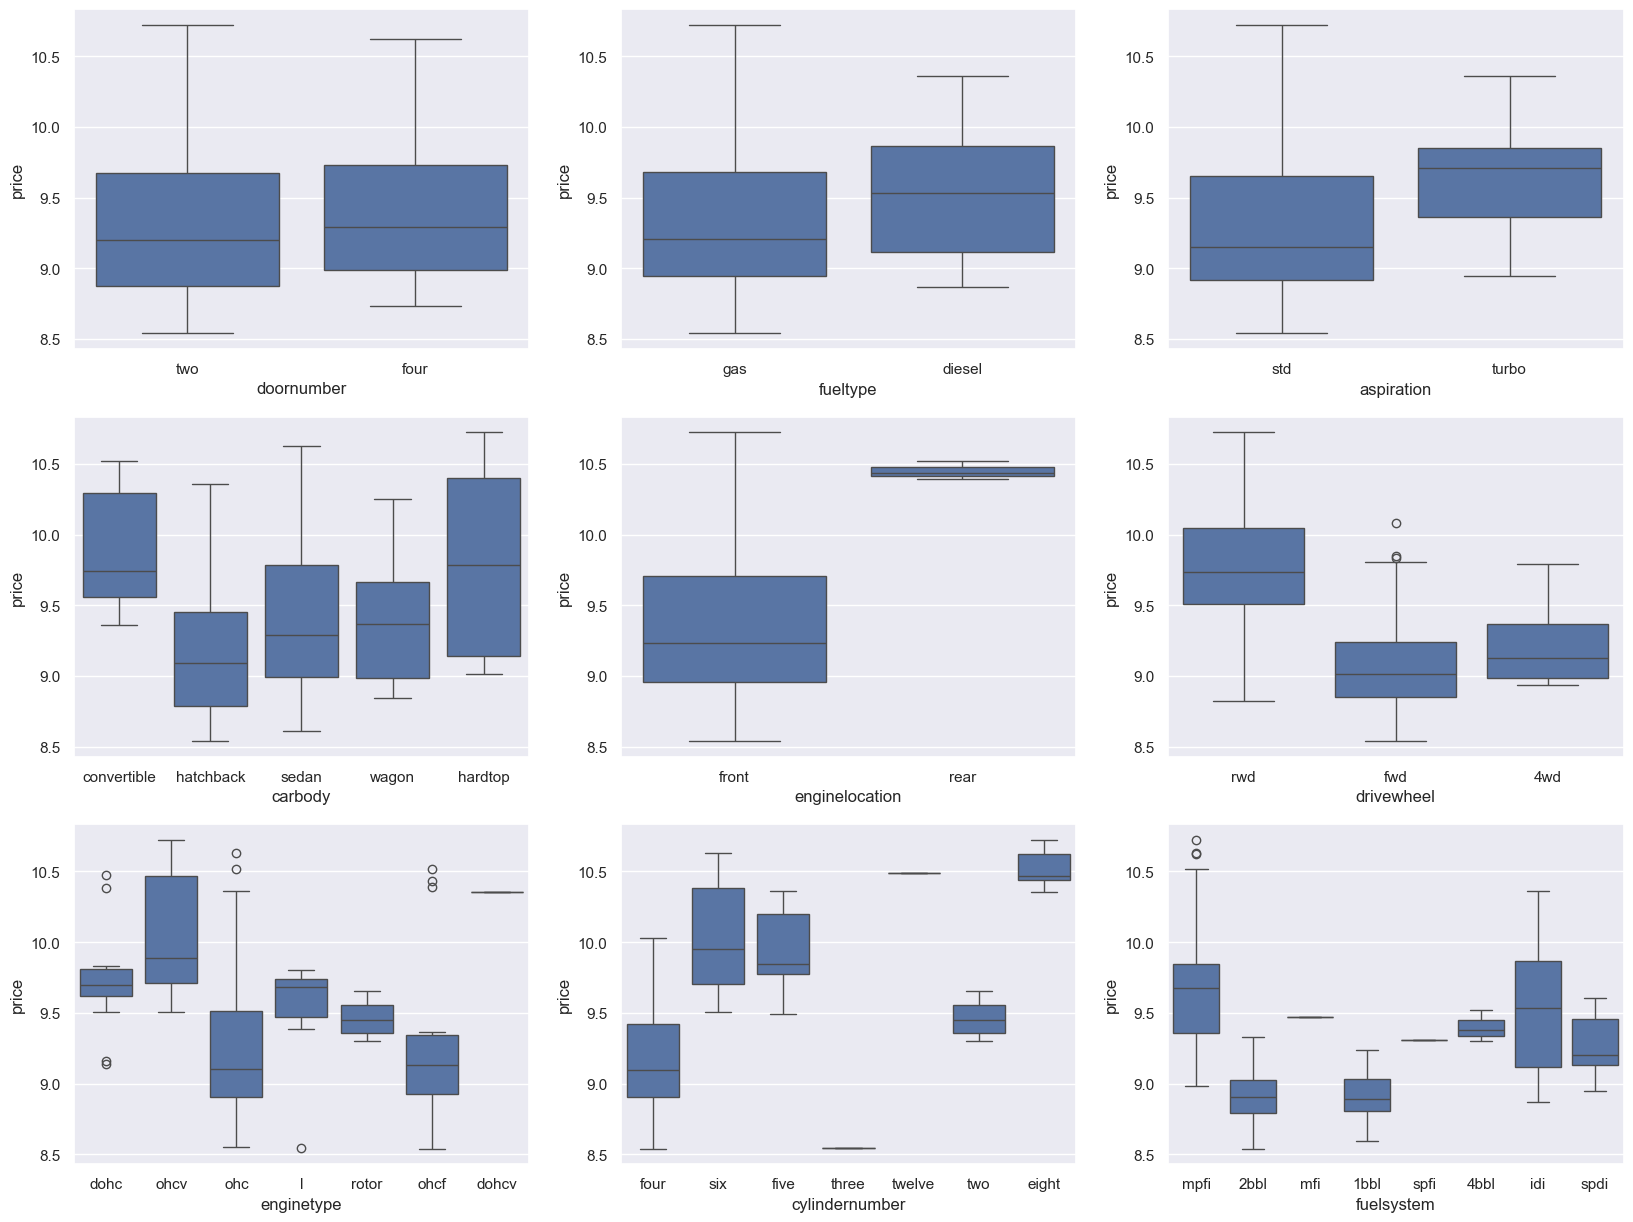

In [185]:
# Now lets visualize some categorical variables to identify relationships
plt.figure(figsize = (20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = data)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)


Text(0, 0.5, 'Frequency of Car body ')

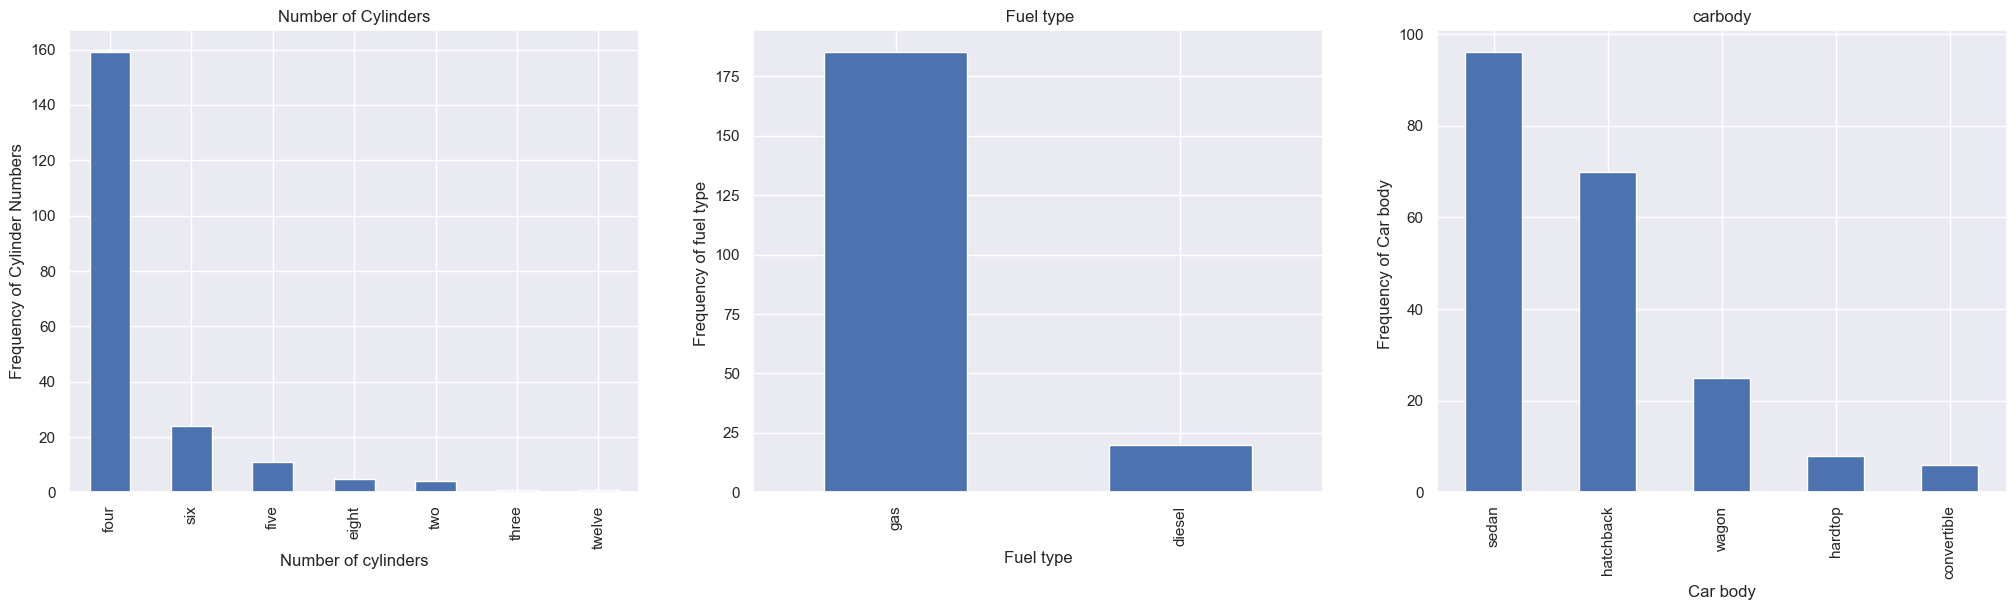

In [186]:
# What about some distributions of some categorical variables
plt.figure(figsize = (25,6))
plt.subplot(1,3,1)
plt1 = data['cylindernumber'].value_counts().plot(kind = 'bar')
plt.title("Number of Cylinders")
plt.xlabel("Number of cylinders")
plt.ylabel("Frequency of Cylinder Numbers")
plt.subplot(1,3,2)
plt2 = data['fueltype'].value_counts().plot(kind = 'bar')
plt.title(" Fuel type")
plt.xlabel("Fuel type")
plt.ylabel("Frequency of fuel type ")
plt.subplot(1,3,3)
plt3 = data['carbody'].value_counts().plot(kind = 'bar')
plt.title("carbody")
plt.xlabel("Car body")
plt.ylabel("Frequency of Car body ")



Most cars use 4 cylinders. 
Cars with fueltype as gas is most prefered. 
converterble cars has a lower population.

In [187]:
# The next step is to encode the categorical variables
# we create a dummy variable for the categorical variables that has more than 2 levels
dammy_col = ['symboling', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'enginetype','cylindernumber', 'fuelsystem']
dummies = pd.get_dummies(data[dammy_col])
dummies = dummies.astype(int)
dummies.shape

(205, 44)

In [188]:
dummies = pd.get_dummies(data[dammy_col], drop_first = True)
dummies = dummies.astype(int)
dummies.shape

(205, 34)

In [189]:
#add the results to the to the original dataframe
data = pd.concat([data, dummies], axis = 1)
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,9.510075,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,9.711116,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,9.711116,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,9.543235,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,9.767095,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.100000,188.800000,68.900000,55.500000,2952,ohc,four,141,mpfi,3.780000,3.150000,9.500000,114,5400,23,28,9.731809,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,-1,gas,turbo,four,sedan,rwd,front,109.100000,188.800000,68.800000,55.500000,3049,ohc,four,141,mpfi,3.780000,3.150000,8.700000,160,5300,19,25,9.854560,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,-1,gas,std,four,sedan,rwd,front,109.100000,188.800000,68.900000,55.500000,3012,ohcv,six,173,mpfi,3.580000,2.870000,8.800000,134,5500,18,23,9.975110,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,-1,diesel,turbo,four,sedan,rwd,front,109.100000,188.800000,68.900000,55.500000,3217,ohc,six,145,idi,3.010000,3.400000,23.000000,106,4800,26,27,10.019936,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [190]:
# Since we have created our dammy variables, lets drop the original columns and the ones we no longer need them
data.drop(data_cat, axis=1, inplace = True)
data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.600000,168.800000,64.100000,48.800000,2548,130,3.470000,2.680000,9.000000,111,5000,21,27,9.510075,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.600000,168.800000,64.100000,48.800000,2548,130,3.470000,2.680000,9.000000,111,5000,21,27,9.711116,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.500000,171.200000,65.500000,52.400000,2823,152,2.680000,3.470000,9.000000,154,5000,19,26,9.711116,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.800000,176.600000,66.200000,54.300000,2337,109,3.190000,3.400000,10.000000,102,5500,24,30,9.543235,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.400000,176.600000,66.400000,54.300000,2824,136,3.190000,3.400000,8.000000,115,5500,18,22,9.767095,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.100000,188.800000,68.900000,55.500000,2952,141,3.780000,3.150000,9.500000,114,5400,23,28,9.731809,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,109.100000,188.800000,68.800000,55.500000,3049,141,3.780000,3.150000,8.700000,160,5300,19,25,9.854560,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,109.100000,188.800000,68.900000,55.500000,3012,173,3.580000,2.870000,8.800000,134,5500,18,23,9.975110,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,109.100000,188.800000,68.900000,55.500000,3217,145,3.010000,3.400000,23.000000,106,4800,26,27,10.019936,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [191]:
# Now lets split our data into training and testng data
input_data = data.drop(columns=['price'])
output_data = data['price']
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=0)
output_data

0     9.510075 
1     9.711116 
2     9.711116 
3     9.543235 
4     9.767095 
        ...    
200   9.731809 
201   9.854560 
202   9.975110 
203   10.019936
204   10.026811
Name: price, Length: 205, dtype: float64

In [192]:
input_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.600000,168.800000,64.100000,48.800000,2548,130,3.470000,2.680000,9.000000,111,5000,21,27,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.600000,168.800000,64.100000,48.800000,2548,130,3.470000,2.680000,9.000000,111,5000,21,27,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.500000,171.200000,65.500000,52.400000,2823,152,2.680000,3.470000,9.000000,154,5000,19,26,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.800000,176.600000,66.200000,54.300000,2337,109,3.190000,3.400000,10.000000,102,5500,24,30,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.400000,176.600000,66.400000,54.300000,2824,136,3.190000,3.400000,8.000000,115,5500,18,22,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.100000,188.800000,68.900000,55.500000,2952,141,3.780000,3.150000,9.500000,114,5400,23,28,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,109.100000,188.800000,68.800000,55.500000,3049,141,3.780000,3.150000,8.700000,160,5300,19,25,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,109.100000,188.800000,68.900000,55.500000,3012,173,3.580000,2.870000,8.800000,134,5500,18,23,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,109.100000,188.800000,68.900000,55.500000,3217,145,3.010000,3.400000,23.000000,106,4800,26,27,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [193]:
x_test.shape

(41, 47)

In [194]:
x_train.shape

(164, 47)

In [195]:
y_train.shape

(164,)

In [196]:
y_test.shape

(41,)

In [197]:
# We scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [198]:
# we fit the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [199]:
model.score(x_train_scaled, y_train)

0.9489211796607679

In [200]:
model.intercept_

9.362132890626308

In [201]:
model.coef_

array([ 1.48482144e-02,  3.17368704e-02,  7.54163177e-02,  8.21059223e-04,
        1.52578718e-01,  5.10170090e-02,  6.29912455e-03, -4.00164072e-02,
       -4.77741723e-02,  3.02940608e-02,  1.65040197e-02, -8.87090344e-02,
        4.92612211e-02, -1.53709173e-02,  2.73685107e-02,  8.72740064e-03,
        2.08457952e-02,  2.46067658e-02, -2.73827166e-02,  4.13833093e-02,
       -4.49189347e-03, -5.19381795e-02, -9.78708483e-02, -8.25525673e-02,
       -7.88068431e-02, -7.95503996e-04,  5.49777832e-02,  7.70318334e-02,
       -2.08166817e-17, -3.35971316e-02,  5.58114776e-02, -2.01407717e-03,
       -3.93022562e-02, -2.91422930e-03, -5.56159199e-02, -1.45713357e-01,
       -4.48084487e-02,  3.46944695e-17, -1.38827941e-02, -2.91422930e-03,
       -4.73424325e-02, -1.18326771e-02,  2.73827166e-02, -6.32917201e-03,
        5.86879756e-03, -2.48343152e-02, -8.96630243e-03])

In [202]:
prediction = model.predict(x_test_scaled)
prediction.shape

(41,)

In [203]:
pred = np.exp(prediction)
pred

array([ 6896.65741273, 18570.5743596 , 13762.74116353,  4865.75712952,
       10381.50127682, 13028.53803665,  6757.4578145 ,  8164.453445  ,
       16650.89475855,  7446.65186996, 18012.93800199, 34288.21885319,
       13409.00669847, 13831.10336376,  6880.50422059, 13109.24610255,
       11685.07177092, 18354.39869621,  9664.95142923,  7132.85162127,
       11594.64728312, 16612.82605947, 11223.69636535, 13770.97296918,
       20057.76283696,  6881.68931653,  8233.79385953, 17736.17947393,
        8215.13970995,  6941.76925382, 10055.69056113, 12026.38865628,
       17387.43676385, 10052.14662978,  7111.30757628, 30158.56051784,
       11749.62226514, 16316.24931198,  6710.64991012, 32167.23852032,
        6481.57658191])